# Relative Grading sheet

In [1]:
#Modules used

import pandas as pd
import sqlite3 as sq
import statistics as st
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
#To Convert excel file into csv
def exl_to_csv(file):
    exl = pd.read_excel(f"{file}.xlsx")
    exl.to_csv(f"{file}.csv")


# Driver
# exl_to_csv(excel file)

In [3]:
#To return a list of column names of the csv file
def get_col_names(file):
    cv = pd.read_csv(f"{file}.csv")
    c = list(cv.columns)[1:]
    return c

# Driver
# raw_table_cols_names = get_col_names(csv file perfix)
# raw_table_cols_types = [datatype of corresponding column names]

In [4]:
#To return the list of data within a given column
def get_col_data(file, col, tname):
    cv = pd.read_csv(f"{file}.csv")
    try:
        res = cv.loc[:,col]
        res = list(res)
        return res
    except:
        connection = sq.connect(database)
        crsr = connection.cursor()
        res = crsr.execute(f"""select "{col}" from "{tname}";""")
        res = list(res)
        try:
            res = [round(i[0], 2) for i in res]
        except:
            res = [i[0] for i in res]
        connection.close()
        return res

# Driver
# get_col_data(csv file's prefix only, column of table)

In [5]:
#To return the list of data within a given row
def get_row_data(tname, key, value):
    connection = sq.connect(database)
    crsr = connection.cursor()
    res = crsr.execute(f"""select * from "{tname}" where "{key}" = "{value}";""")
    res = list(res)[0]
    connection.close()
    return res


In [6]:
#To create a table with given columns and table name
def create_db(tbl_name, columns):
    connection = sq.connect(database)
    crsr = connection.cursor()
    command = f"""create table if not exists "{tbl_name}" ("""
    for i in range(len(columns)):
        for j in range(len(columns[i])):
            if j == 0:
                command += f" '{columns[i][j]}'"
            else:
                command += f" {columns[i][j]}"
        command += ","
    command = command[:-1]+ ");"
    crsr.execute(command)
    connection.close()

#  Driver
# cols = list(map(lambda x, y: [x, y], raw_table_cols_names, raw_table_cols_types))
# create_db(table name, nested list of column names and their datatype)

In [7]:
#To insert give data in the table
def insert(tbl_name, rec_row):
    conn = sq.connect(database)
    crsr = conn.cursor()
    command = f"""insert into "{tbl_name}" values("""
    for i in range(len(rec_row)):
        if type(rec_row[i]) != str:
            command += f''' {rec_row[i]},'''
        else:
            command += f''' "{rec_row[i]}",'''
    command = command[:-1] + ");"
    crsr.execute(command)
    conn.commit()
    conn.close()


# Driver
# iterable = []
# for col in raw_table_cols_names:
#     iterable.append(get_col_data(dataset, col))
# iterable[0] =[i[0:-2] if "." in i else i for i in iterable[0] ] 
# func = lambda pin, name, m1, m2, m3, m4, m5, cor, as1, as2: [pin, name, m1, m2, m3, m4, m5, cor, as1, as2]
# rec = list((map(func, *iterable)))
# for i in rec:
#     insert(raw_table, i)


In [8]:
#To return a value from table in given column corresponding to the given key
def query_val(required, tname, col, key):
    connection = sq.connect(database)
    crsr = connection.cursor()
    res = crsr.execute(f"""select "{required}" from "{tname}" where "{col}" = "{key}";""")
    res = list(res)[0][0]
    connection.close()
    return res


# Driver
# id = get_col_data(dataset, raw_table_cols_names[0])
# id = [i[:-2] if "." in i else i for i in id]
# for each in id:
#     cols = [
#         ["mode", "text"],
#         ["marks", "real"]
#     ]
#     create_db(each, cols)
#     exam_type = raw_table_cols_names[2:]
#     for t in exam_type:
#         rec = [t, query_val(t, raw_table, raw_table_cols_names[0], each)]
#         insert(each, rec)

In [9]:
#To add an extra column in the table
def add_col(tname, col, col_type):
    connection = sq.connect(database)
    crsr = connection.cursor()
    command = f"""alter table "{tname}" add column "{col}" "{col_type}";"""
    crsr.execute(command)
    connection.close()

# Driver
# add_col(raw_table, "total", "real")
# raw_table_cols_names.append("Total")
# raw_table_cols_types.append("real")

In [10]:
#To insert the data in the empty column
def update(tname, col, value, title, key):
    connection = sq.connect(database)
    crsr = connection.cursor()
    command = f"""update "{tname}" set "{col}" = "{value}" where "{title}" = "{key}";"""
    crsr.execute(command)
    connection.commit()
    connection.close()


# Driver
# for each in id:
#     update(raw_table, "total", sums(each, "marks"), raw_table_cols_names[0], each)

In [11]:
#To return the minimum value in the given column
def min(tname, col):
        connection = sq.connect(database)
        crsr = connection.cursor()
        res = crsr.execute(f"""
        select min("{col}") from "{tname}";
        """)
        try:
                res = round((list(res)[0][0]), 3)
        except:
                res = list(res)[0][0]
        connection.close()
        return res

#To return the maximum value in the given column
def max(tname, col):
        connection = sq.connect(database)
        crsr = connection.cursor()
        res = crsr.execute(f"""
        select max("{col}") from "{tname}";
        """)
        try:
                res = round((list(res)[0][0]), 3)
        except:
                res = list(res)[0][0]
        connection.close()
        return res

#To return the Average value of the given column
def mean(tname, col):
        connection = sq.connect(database)
        crsr = connection.cursor()
        res = crsr.execute(f"""
        select avg("{col}") from "{tname}";
        """)
        try:
                res = round((list(res)[0][0]), 3)
        except:
                res = list(res)[0][0]
        connection.close()
        return res

#To return the Standard Deviation value of the given column
def stdv(col):
        return round((st.stdev(get_col_data(dataset, col, raw_table))), 3)

#To return the Sum value of the given column
def sums(tname, col):
        if type(col) == str:
                connection = sq.connect(database)
                crsr = connection.cursor()
                res = crsr.execute(f"""select sum("{col}") from "{tname}";""")
                try:
                        res = round((list(res)[0][0]), 3)
                except:
                        res = list(res)[0][0]
                connection.close()
                return res
        else:
                return round(reduce(lambda a, b: (a+b), col), 3)

# Driver
# seg = list(map(lambda x, y: [x, y], raw_table_cols_names[2:], raw_table_cols_types[2:]))
# cols = [["Operation", "text"], *seg]
# create_db(class_report, cols)
# rec = [
#         ["Minimum", *([min(raw_table, i) for i in raw_table_cols_names[2:]])],
#         ["Maximum", *([max(raw_table, i) for i in raw_table_cols_names[2:]])],
#         ["Mean", *([mean(raw_table, i) for i in raw_table_cols_names[2:]])],
#         ["Std-Dev", *([stdv(i) for i in raw_table_cols_names[2:]])]
# ]
# for i in rec:
#     insert(class_report, i)

In [12]:
#To return RELATIVE GRADE
def grading(score, avg, sd):
    if score > (avg + 1.5*sd):
        return (10, "A+")
    elif score <= (avg + 1.5*sd) and score > (avg + sd):
        return (9, "A")
    elif score <= (avg + sd) and score > (avg + 0.5*sd):
        return (8, "B+")
    elif score <= (avg + 0.5*sd) and score > avg:
        return (7, "B")
    elif score <= avg and score > (avg - 0.5*sd):
        return (6, "C+")
    elif score <= (avg - 0.5*sd) and score > (avg - sd):
        return (5, "C")
    elif score <= (avg - sd) and score > (avg - 1.5*sd):
        return (4, "D")
    elif score <= (avg-1.5*sd):
        return (0, "F")
        
#Driver
# add_col(raw_table, "CGPA", "real")
# for each in id:
#     sc = query_val("total", raw_table, raw_table_cols_names[0], each)
#     a = query_val("total", class_report, "Operation", "Mean")
#     sd = query_val("total", class_report, "Operation", "Std-Dev")
#     update(raw_table, "CGPA", grading(sc, a, sd), raw_table_cols_names[0], each)


In [13]:
def each_report(key):
    data = get_col_data(dataset, "Obtained-Marks", key)[:-1]
    data = [((i/j)*4) for i, j in zip(data, full_marks)]
    ticks = raw_table_cols_names[2:-3]
    head = {
        "size": 20,
        "style": "oblique",
        "color": "red"
    }
    plt.plot(ticks, data)
    plt.xticks(ticks, rotation = "vertical")
    key = query_val(raw_table_cols_names[1], raw_table, raw_table_cols_names[0], key)
    plt.title(f"Line Graph of Marks obtained by {key} out of 4", fontdict=head)
    plt.show()

def class_avg_report():
    data = get_row_data(class_report, "Operation", "Mean")[1:-3]
    data = [((i/j)*4) for i, j in zip(data, full_marks)]
    ticks = raw_table_cols_names[2:-3]
    head = {
        "size": 20,
        "style": "oblique",
        "color": "red"
    }
    plt.plot(ticks, data)
    plt.xticks(ticks, rotation = "vertical")
    plt.title(f"Line Graph of Average Marks of Class out of 4", fontdict=head)
    plt.show()

def disp_each_rep():
    pins = get_col_data(dataset, raw_table_cols_names[0], raw_table)
    pins = [i[:-2] if "." in i else i for i in pins]
    for each in pins:
        each_report(each)
        

## Battle Field

In [14]:
#Variables

database = "playground.db"
raw_table = "raw"
class_report = "class_report"
dataset = "dataset"

#Convert excel file into csv
exl_to_csv(dataset)

#list of columns and datatype of columns of a table
raw_table_cols_names = get_col_names(dataset)
raw_table_cols_names.extend(["Total", "CGPA", "Grade"])
raw_table_cols_types = ["text primary key", "text", "real",  "real",  "real",  "real",  "real",  "real",  "real",  "real", "real", "real", "real"]
full_marks = [4, 4, 4, 4, 4, 4, 10, 6]

#Creating a table
cols = list(map(lambda x, y: [x, y], raw_table_cols_names, raw_table_cols_types))
create_db(raw_table, cols)

#Inserting values of csv file into the table
iterable = []
for col in raw_table_cols_names[:-3]:
    data = get_col_data(dataset, col, raw_table)
    iterable.append(data)
# print("\n", iterable, "\n")
iterable[0] =[i[0:-2] if "." in i else i for i in iterable[0]]
iterable.append([0 for i in range(len(data))])
iterable.append([0 for i in range(len(data))])
iterable.append([0 for i in range(len(data))])
func = lambda pin, name, m1, m2, m3, m4, m5, cor, as1, as2, t, c, g: [pin, name, m1, m2, m3, m4, m5, cor, as1, as2, t, c, g]
rec = list((map(func, *iterable)))
for i in rec:
    try:
        insert(raw_table, i)
    except:
        pass

key = raw_table_cols_names[0]
value = get_col_data(dataset, key, raw_table)
value =[i[0:-2] if "." in i else i for i in value]

for each in value:
    total = sums(raw_table, get_row_data(raw_table, key, each)[2:-3])
    update(raw_table, "Total", total, key, each)

#Creating new table and Inserting processed values
seg = list(map(lambda x, y: [x, y], raw_table_cols_names[2:], raw_table_cols_types[2:]))
cols = [["Operation", "text primary key"], *seg]
create_db(class_report, cols)

rec = [
        ["Minimum", *([min(raw_table, i) for i in raw_table_cols_names[2:]])],
        ["Maximum", *([max(raw_table, i) for i in raw_table_cols_names[2:]])],
        ["Mean", *([mean(raw_table, i) for i in raw_table_cols_names[2:]])],
        ["Std-Dev", *([stdv(i) for i in raw_table_cols_names[2:]])]
]
for i in rec:
    try:
        insert(class_report, i)
    except:
        pass


#Inserting processed values into the new column
key = raw_table_cols_names[0]
value = get_col_data(dataset, key, raw_table)
value =[i[0:-2] if "." in i else i for i in value]
for each in value:
    sc = query_val("Total", raw_table, key, each)
    a = query_val("Total", class_report, "Operation", "Mean")
    sd = query_val("Total", class_report, "Operation", "Std-Dev")
    cgpa, grade = grading(sc, a, sd)
    update(raw_table, "CGPA", cgpa, key, each)
    update(raw_table, "Grade", grade, key, each)


#Inserting processed values into the new column
value = get_col_data(dataset, "Operation", class_report)
for each in value:
    sc = query_val("Total", class_report, "Operation", each)
    a = query_val("Total", class_report, "Operation", "Mean")
    sd = query_val("Total", class_report, "Operation", "Std-Dev")
    cgpa, grade = grading(sc, a, sd)
    update(class_report, "CGPA", cgpa, "Operation", each)
    update(class_report, "Grade", grade, "Operation", each)




#Creating tables for each records of the main table and inserting the values.
id = get_col_data(dataset, raw_table_cols_names[0], raw_table)
id = [i[:-2] if "." in i else i for i in id]
for each in id:
    cols = [
        ["Mode", "text primary key"],
        ["Obtained-Marks", "real"],
        ["Grade", "real"],
        ["CGPA", "real"],
        ["Highest-Marks", "real"],
        ["Full-Marks", "real"]
    ]
    create_db(each, cols)
    exam_type = raw_table_cols_names[2:-2]
    full_marks.append(sums(raw_table, full_marks))
    for et, fm in zip(exam_type, full_marks):
        marks = query_val(et, raw_table, raw_table_cols_names[0], each)
        average = query_val(et, class_report, "Operation", "Mean")
        stdndv = query_val(et, class_report, "Operation", "Std-Dev")
        grade = grading(marks, average, stdndv)
        maxi = max(raw_table, et)
        rec = [et, marks, grade[1], grade[0], maxi, fm]
        insert(each, rec)


IndexError: list index out of range

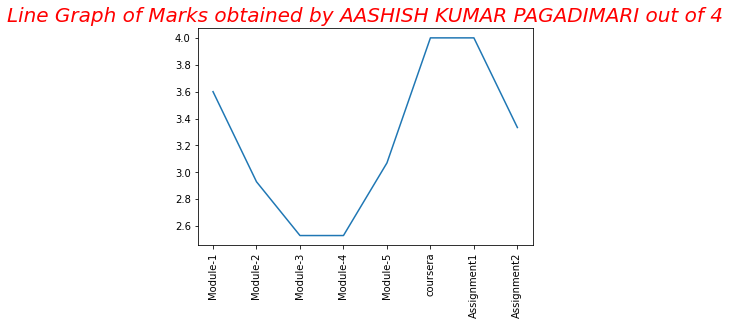

In [ ]:
each_report("HU221910301001")

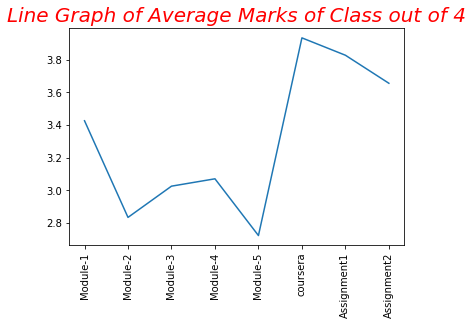

In [ ]:
class_avg_report()

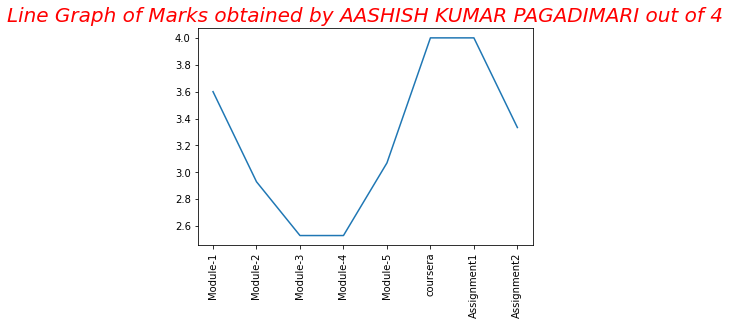

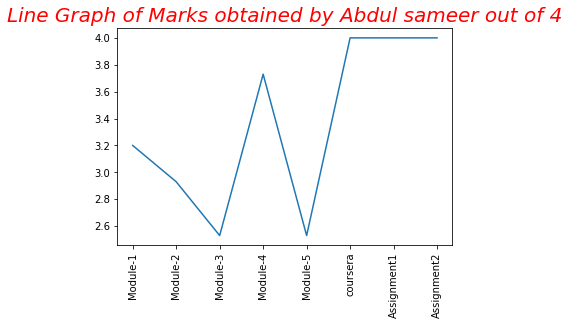

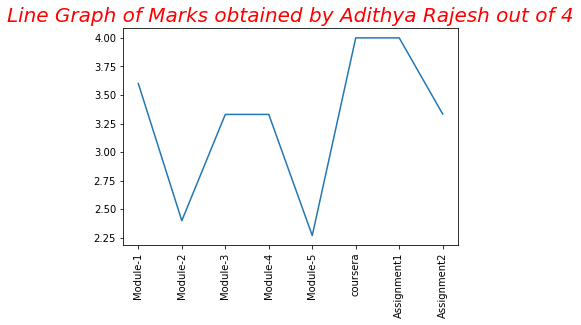

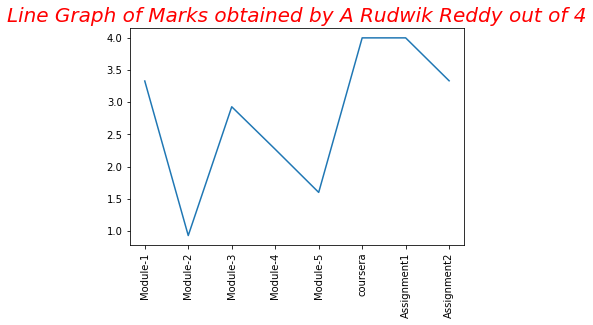

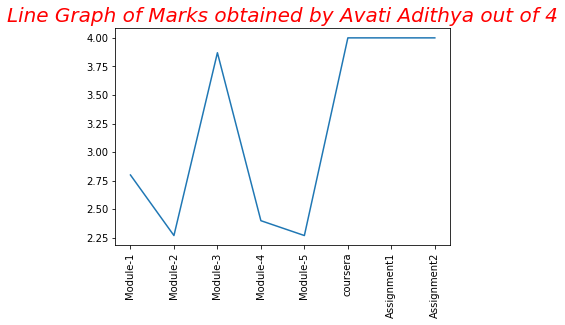

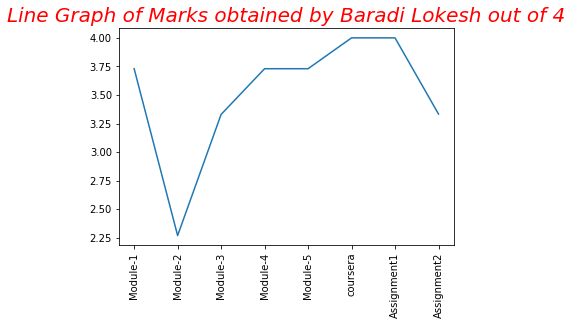

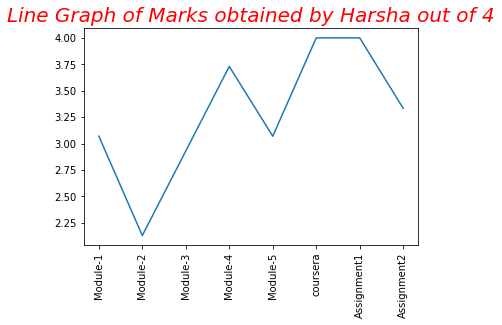

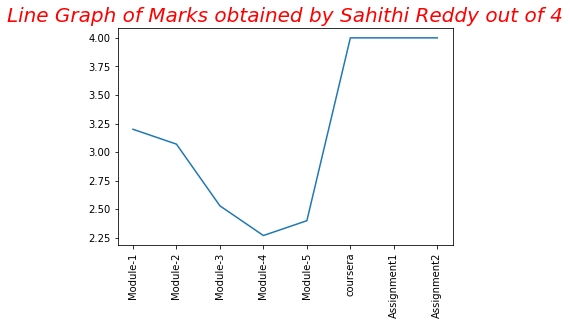

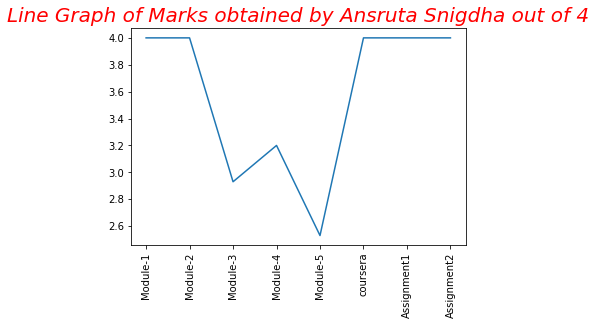

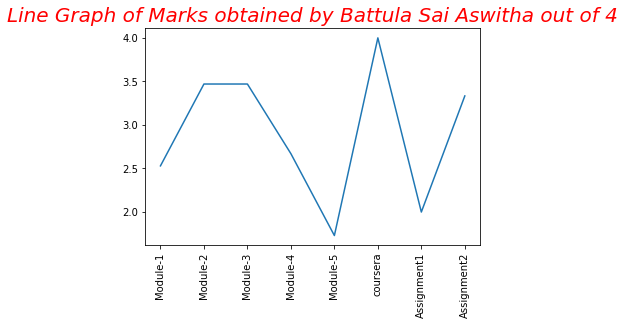

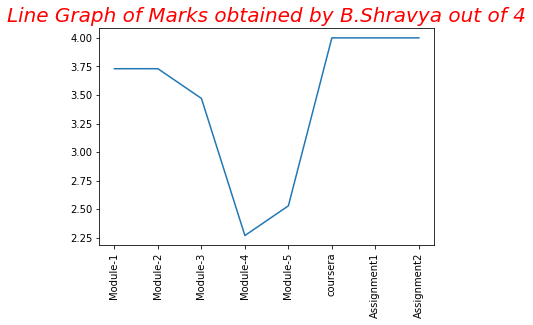

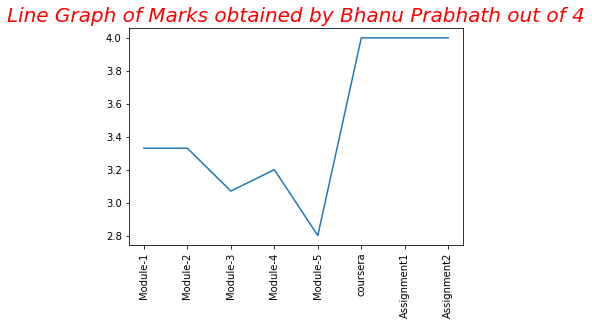

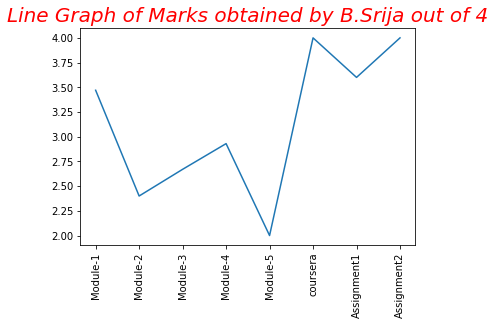

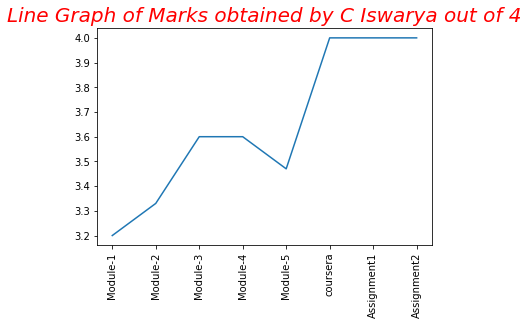

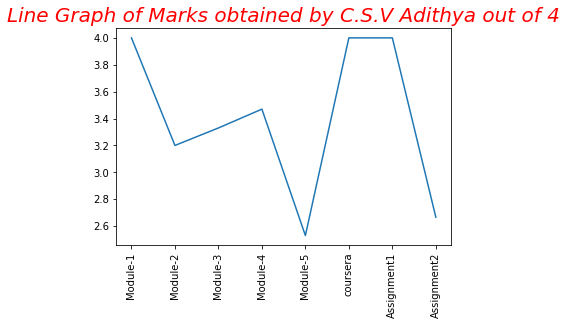

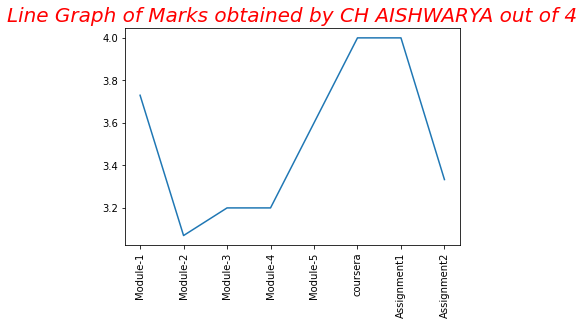

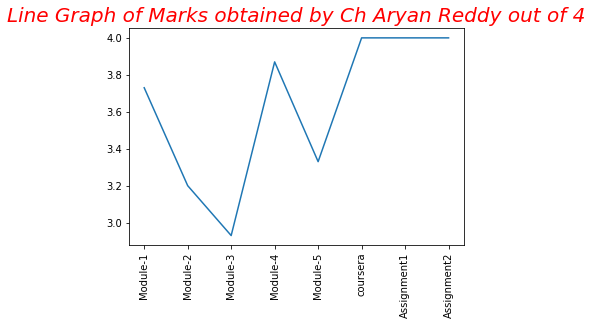

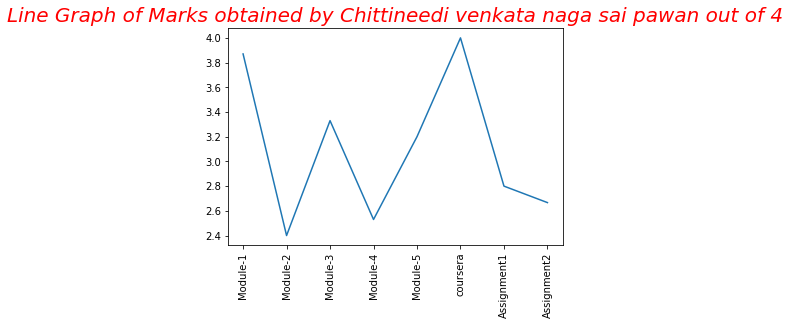

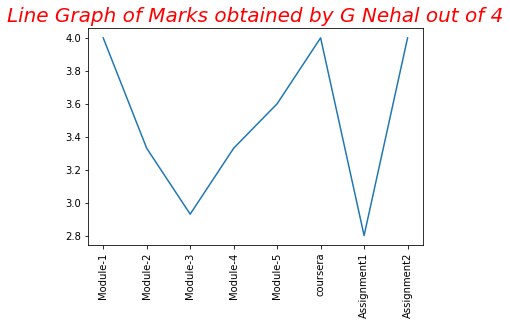

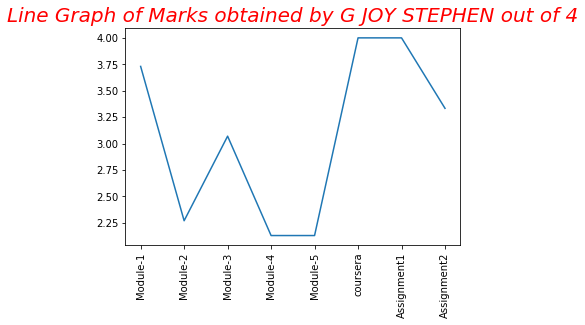

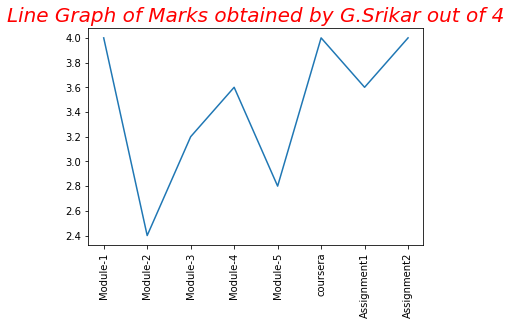

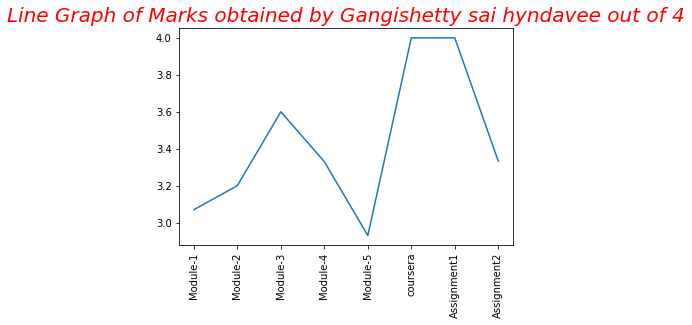

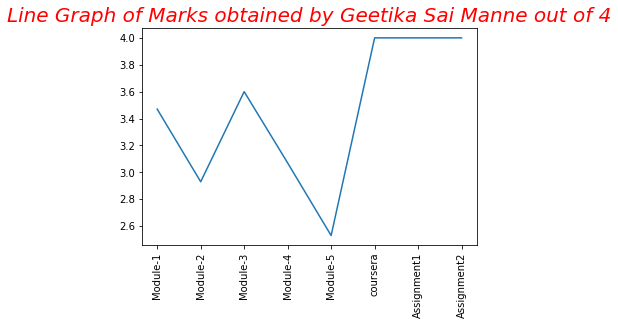

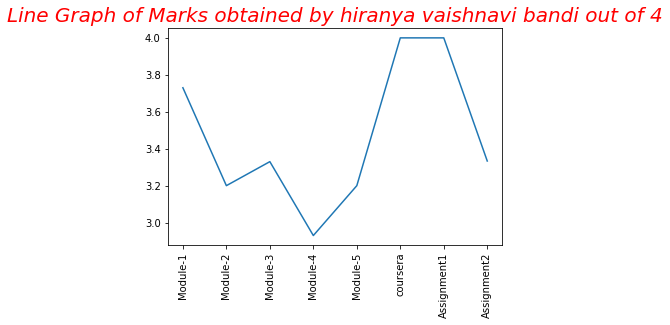

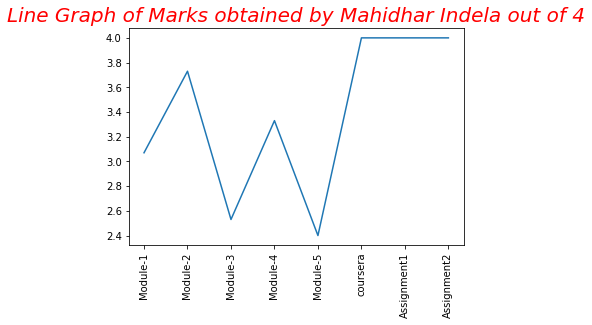

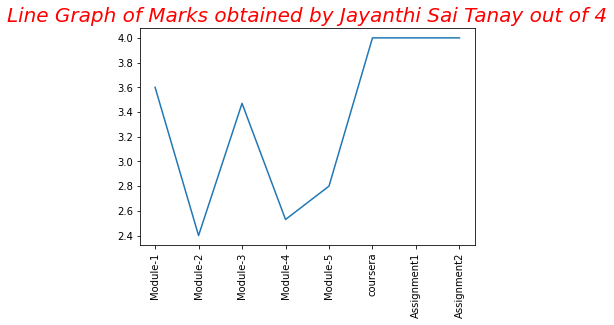

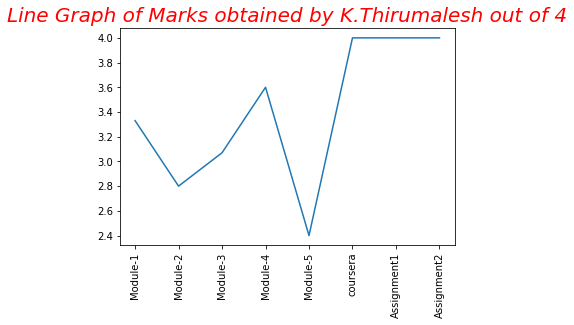

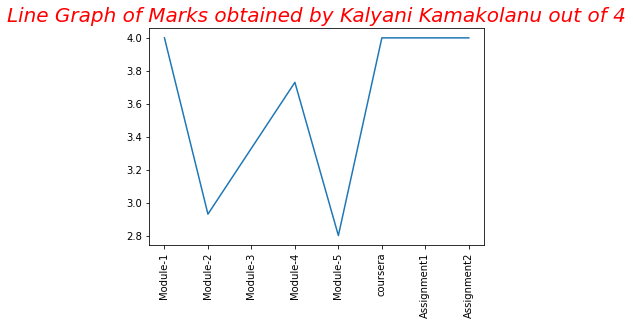

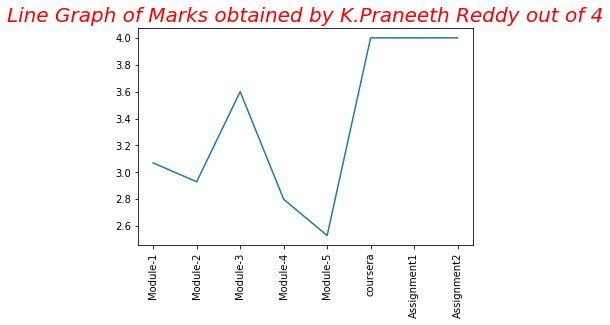

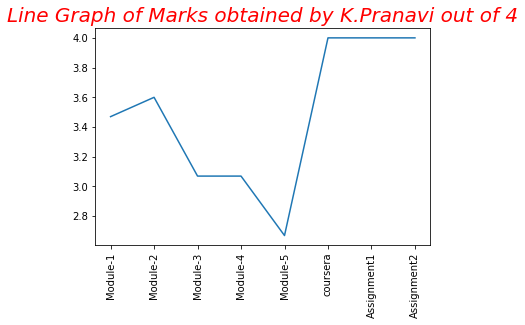

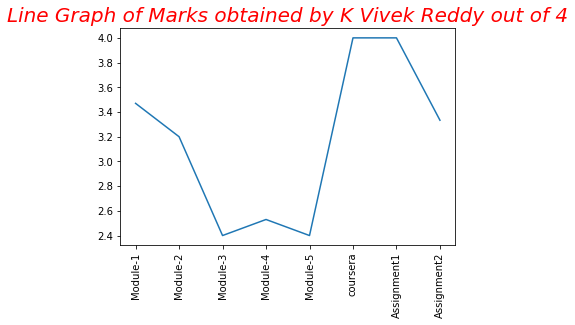

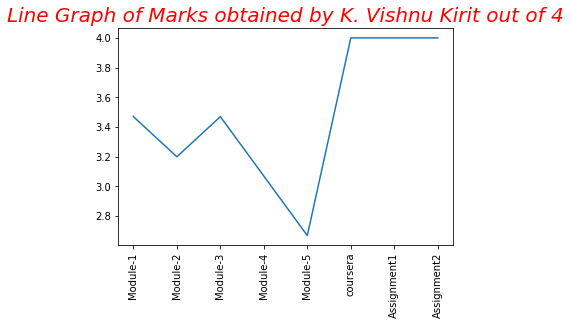

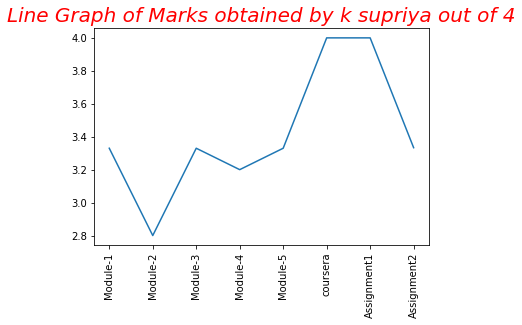

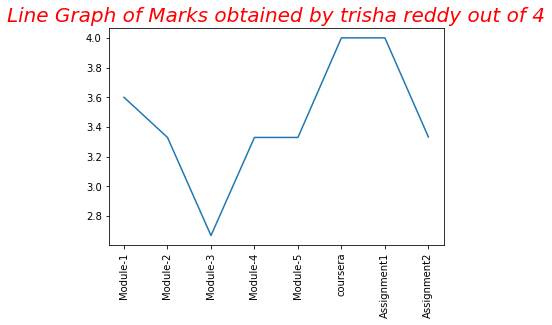

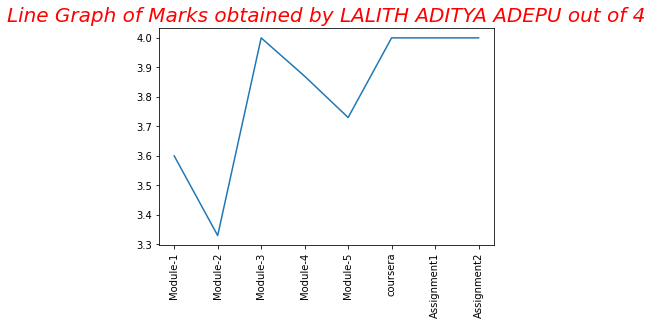

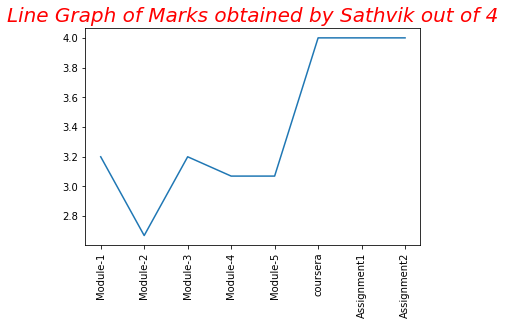

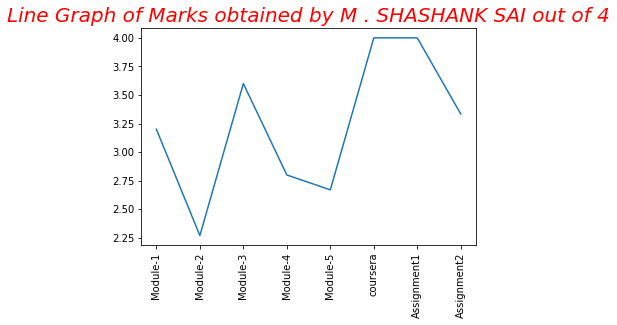

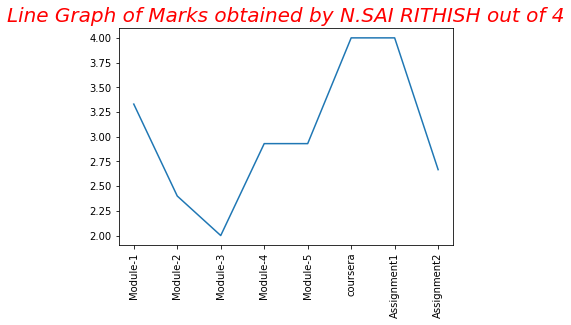

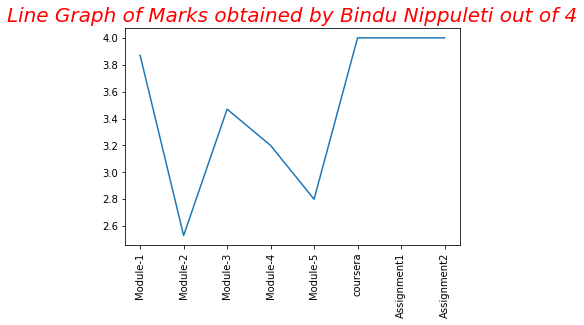

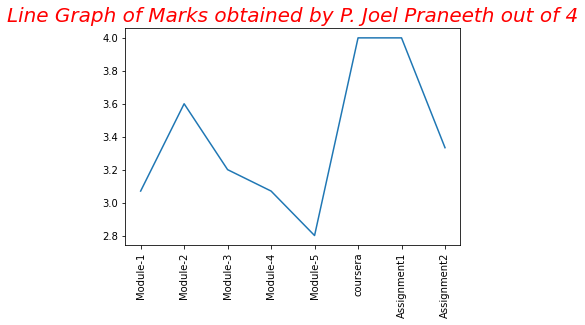

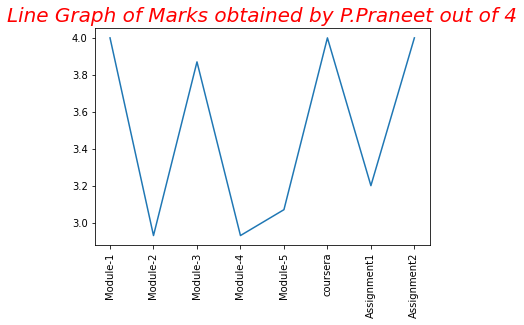

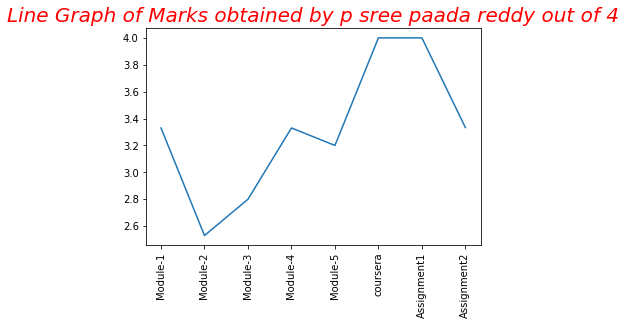

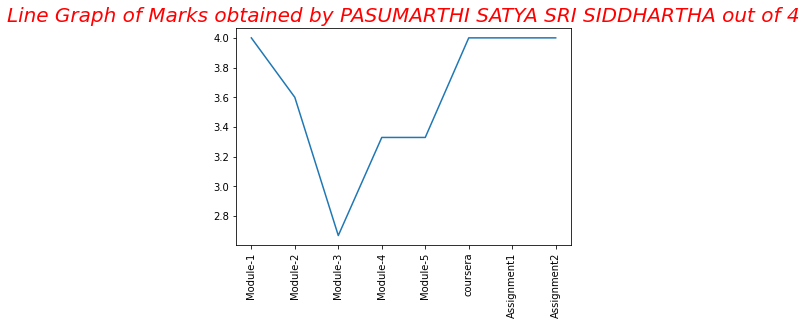

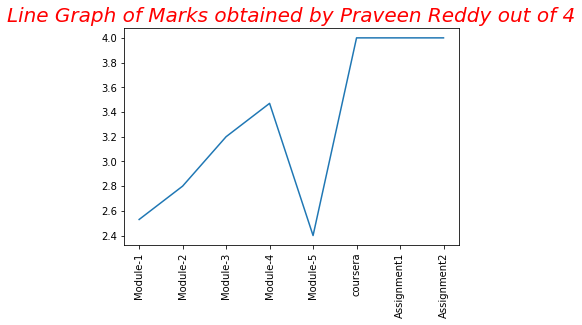

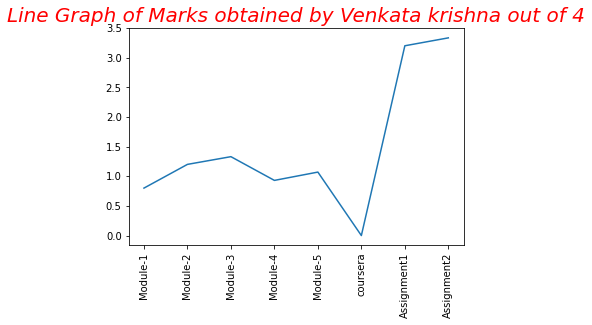

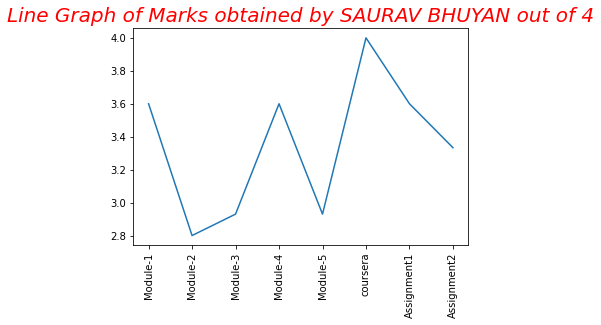

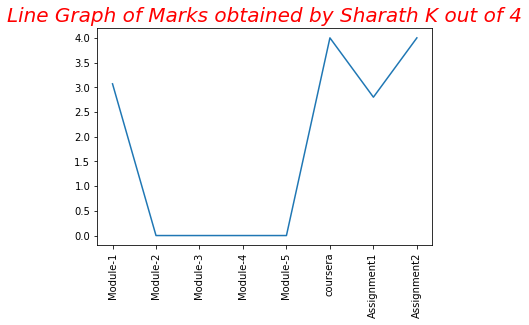

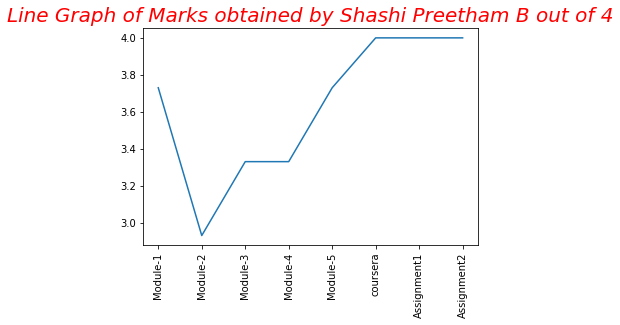

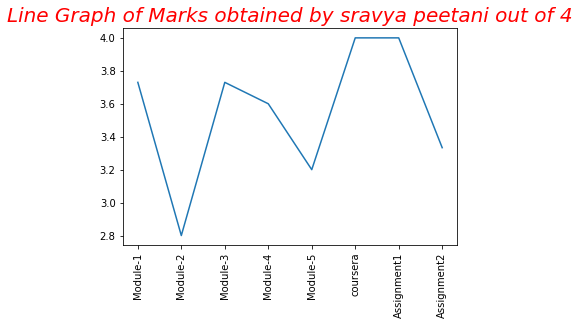

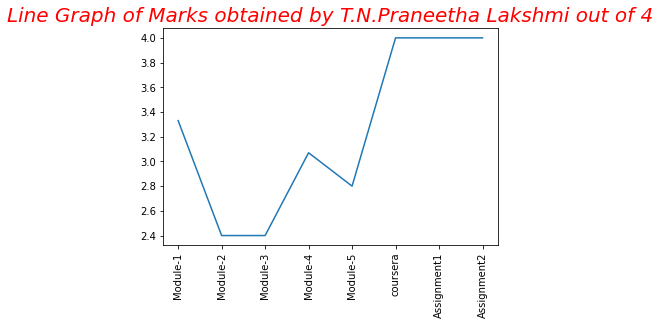

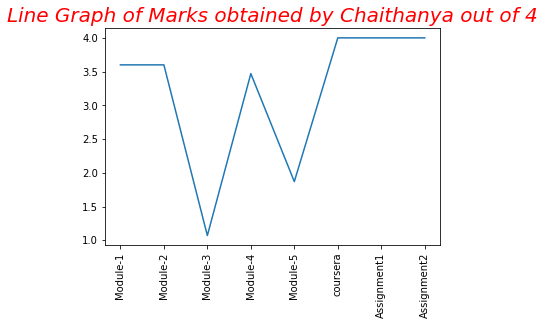

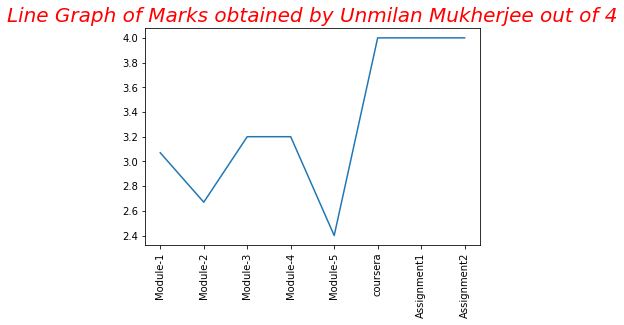

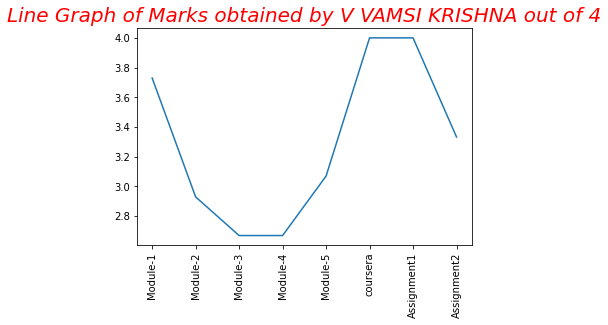

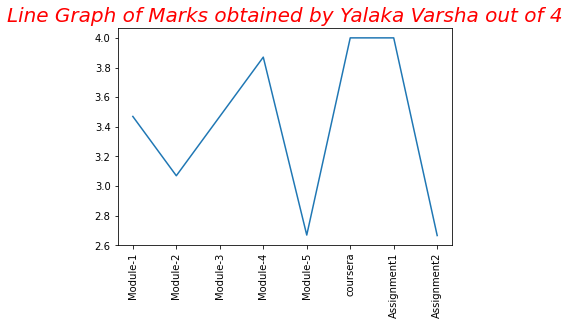

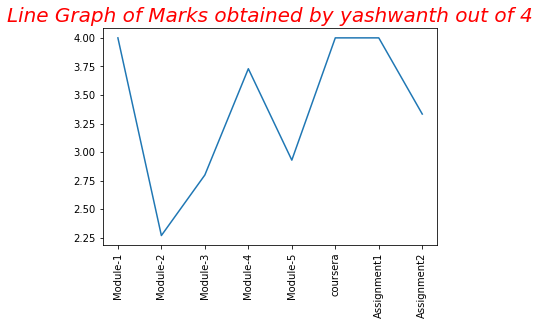

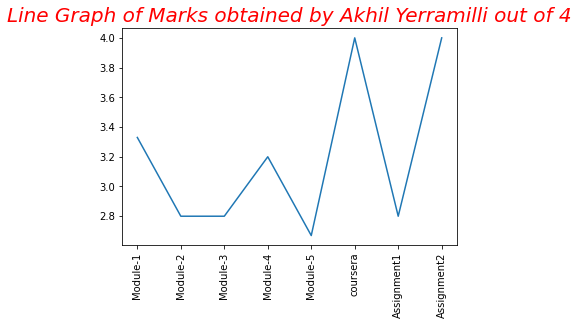

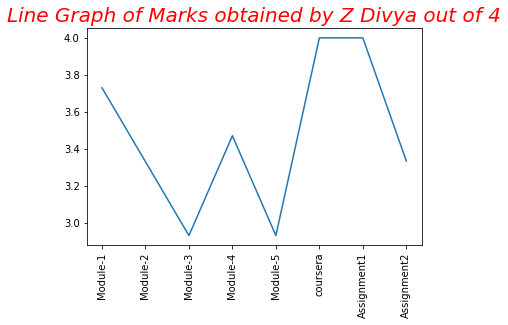

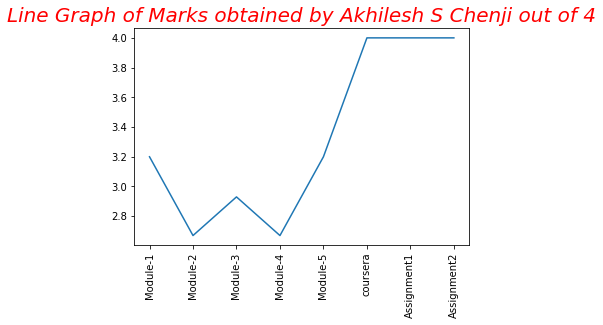

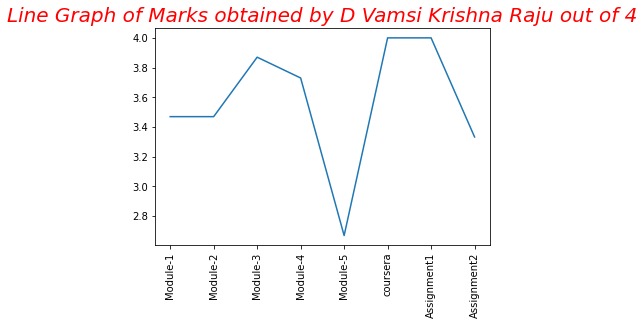

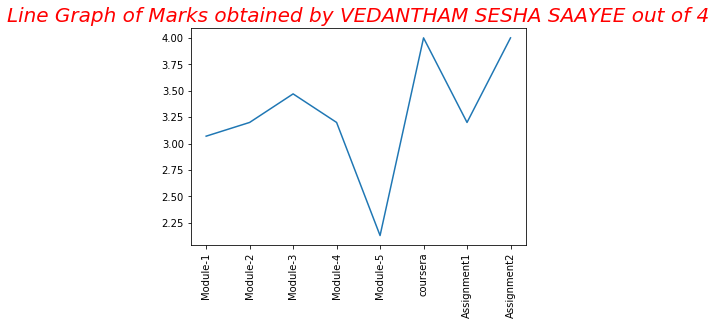

In [ ]:
disp_each_rep()